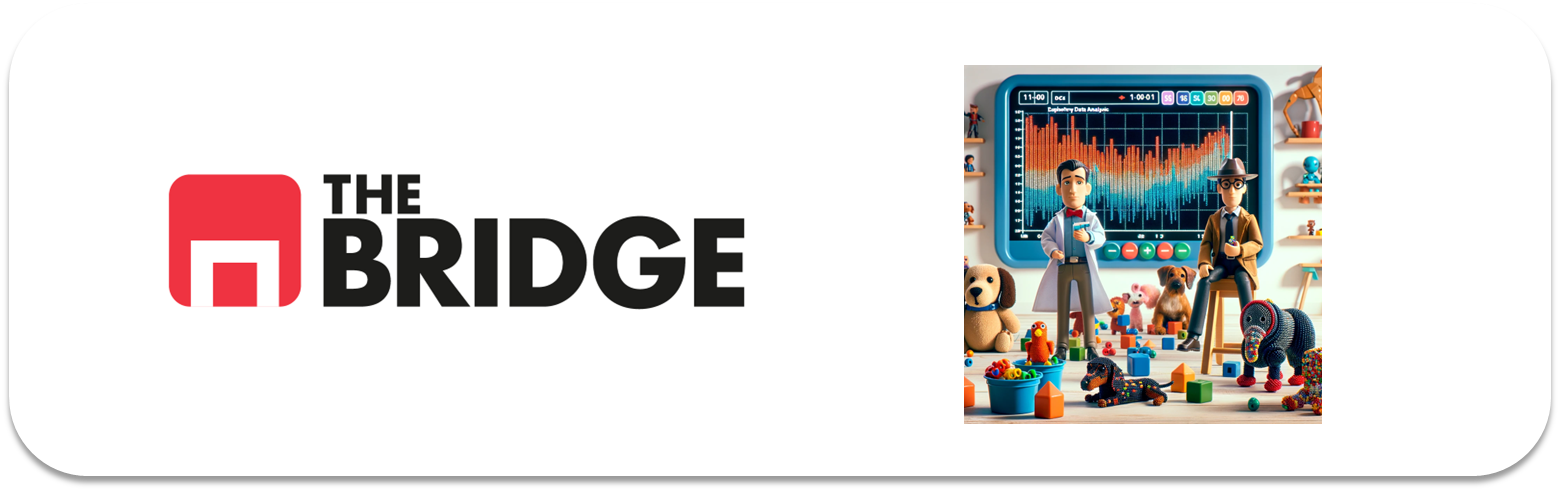

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bootcampviztools import *

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.drop(columns=["survived","pclass","deck","embarked"],inplace=True)
df_titanic

sex   age  sibsp  parch     fare   class    who  adult_male  \
0      male  22.0      1      0   7.2500   Third    man        True   
1    female  38.0      1      0  71.2833   First  woman       False   
2    female  26.0      0      0   7.9250   Third  woman       False   
3    female  35.0      1      0  53.1000   First  woman       False   
4      male  35.0      0      0   8.0500   Third    man        True   
..      ...   ...    ...    ...      ...     ...    ...         ...   
886    male  27.0      0      0  13.0000  Second    man        True   
887  female  19.0      0      0  30.0000   First  woman       False   
888  female   NaN      1      2  23.4500   Third  woman       False   
889    male  26.0      0      0  30.0000   First    man        True   
890    male  32.0      0      0   7.7500   Third    man        True   

     embark_town alive  alone  
0    Southampton    no  False  
1      Cherbourg   yes  False  
2    Southampton   yes   True  
3    Southampton   yes  False  
4    Southampton    no   True  
..           ...   ...    ...  
886  Southampton    no   True  
887  Southampton   yes   True  
888  Southampton    no  False  
889    Cherbourg   yes   True  
890   Queenstown    no   True  

[891 rows x 11 columns]

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

<span style = "color:red">Ya se ha hecho en el 1.1<span>

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [3]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(["sibsp","parch"],axis=1,inplace=True)
df_titanic

sex   age     fare   class    who  adult_male  embark_town alive  \
0      male  22.0   7.2500   Third    man        True  Southampton    no   
1    female  38.0  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.0   7.9250   Third  woman       False  Southampton   yes   
3    female  35.0  53.1000   First  woman       False  Southampton   yes   
4      male  35.0   8.0500   Third    man        True  Southampton    no   
..      ...   ...      ...     ...    ...         ...          ...   ...   
886    male  27.0  13.0000  Second    man        True  Southampton    no   
887  female  19.0  30.0000   First  woman       False  Southampton   yes   
888  female   NaN  23.4500   Third  woman       False  Southampton    no   
889    male  26.0  30.0000   First    man        True    Cherbourg   yes   
890    male  32.0   7.7500   Third    man        True   Queenstown    no   

     alone  family_members  
0    False               1  
1    False               1  
2     True               0  
3    False               1  
4     True               0  
..     ...             ...  
886   True               0  
887   True               0  
888  False               3  
889   True               0  
890   True               0  

[891 rows x 10 columns]

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [19]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [17]:
df_titanic["embark_town"].mode()[0]

'Southampton'

In [4]:
df_titanic.loc[df_titanic["embark_town"].isna(),"embark_town"] = df_titanic["embark_town"].mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [5]:
lista = df_titanic["who"].unique().tolist()
lista

['man', 'woman', 'child']

In [6]:
for i in lista:
    df_titanic.loc[(df_titanic["who"] == i) & (df_titanic["age"].isna()),"age"] = df_titanic.loc[df_titanic["who"]==i,"age"].mean()

In [68]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [70]:
df_titanic.head(10)

sex        age     fare   class    who  adult_male  embark_town alive  \
0    male  22.000000   7.2500   Third    man        True  Southampton    no   
1  female  38.000000  71.2833   First  woman       False    Cherbourg   yes   
2  female  26.000000   7.9250   Third  woman       False  Southampton   yes   
3  female  35.000000  53.1000   First  woman       False  Southampton   yes   
4    male  35.000000   8.0500   Third    man        True  Southampton    no   
5    male  33.173123   8.4583   Third    man        True   Queenstown    no   
6    male  54.000000  51.8625   First    man        True  Southampton    no   
7    male   2.000000  21.0750   Third  child       False  Southampton    no   
8  female  27.000000  11.1333   Third  woman       False  Southampton   yes   
9  female  14.000000  30.0708  Second  child       False    Cherbourg   yes   

   alone  family_members  
0  False               1  
1  False               1  
2   True               0  
3  False               1  
4   True               0  
5   True               0  
6   True               0  
7  False               4  
8  False               2  
9  False               1

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

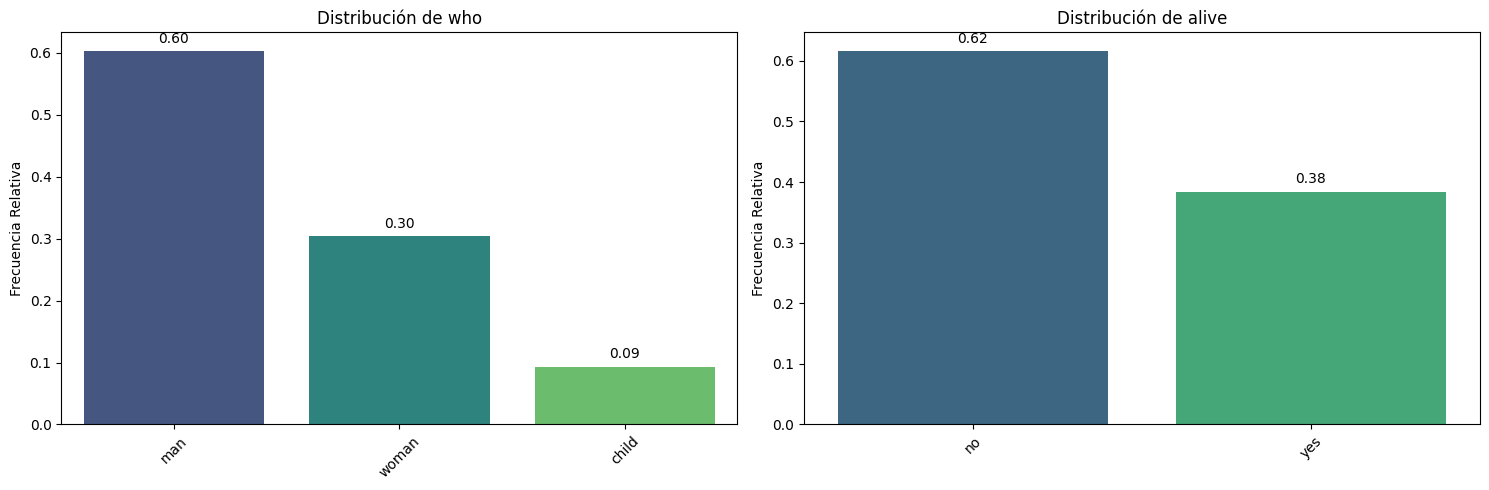

In [7]:
pinta_distribucion_categoricas(df_titanic,["who","alive"],relativa=True,mostrar_valores=True)

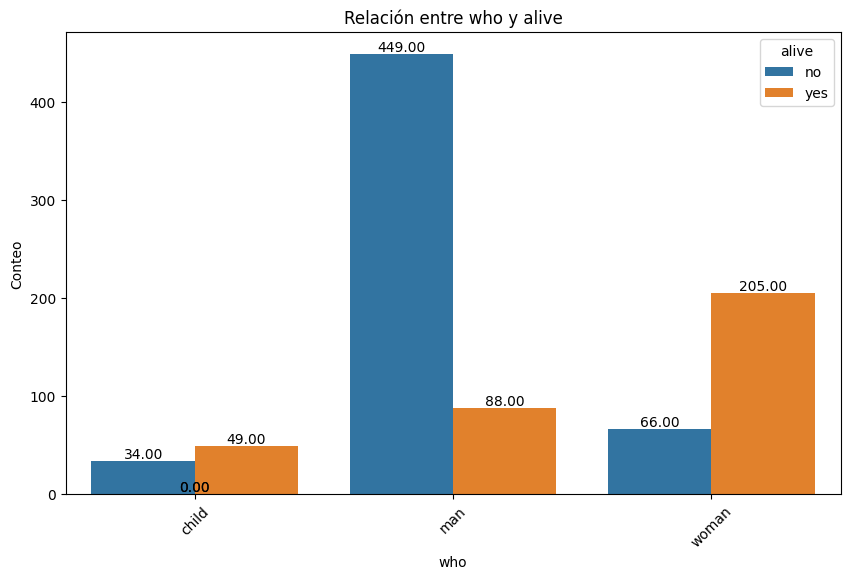

In [9]:
plot_categorical_relationship_fin(df_titanic,"who","alive",show_values=True)

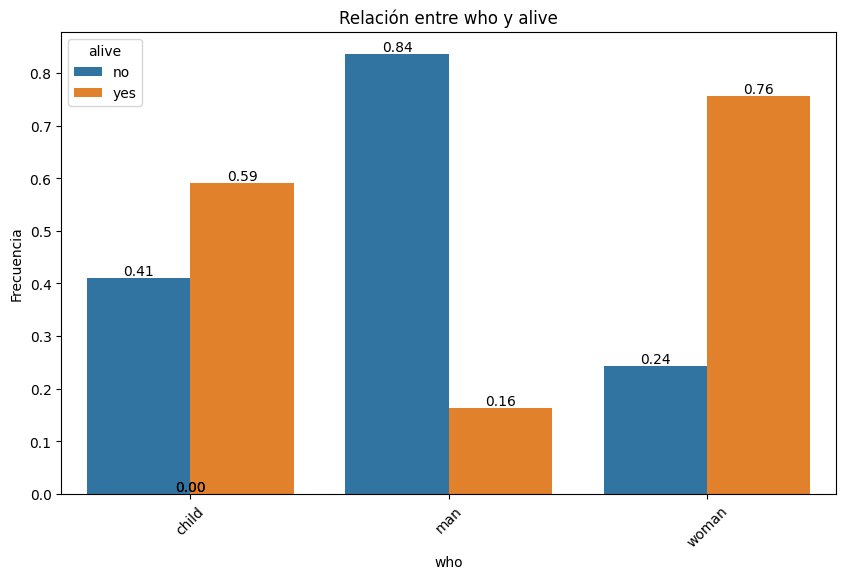

In [73]:
plot_categorical_relationship_fin(df_titanic,"who","alive",relative_freq=True,show_values=True)

In [8]:
df_titanic.loc[df_titanic["who"] == "woman"].age.min()

np.float64(16.0)

<span style="color:red">We are able to appreciate that most of the man don't survive, only 0.16% .If we compare with woman , the gender female have a better possibility to survive with the 0.76%. I wouldn't say nothing, by now ,about the children because the quantity of them are to much less than man and woman.
In conclussion I give my hypotesis that the gender and survive are dependents</span>

In [11]:
from scipy.stats import chi2_contingency
tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"])
p_value = chi2_contingency(tabla_contingencia)[1]
p_value

np.float64(2.2227620817798914e-62)

In [12]:
def tricategorical_analysis(df,directora,otras,relativa=False,muetra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    dicc = {}
    for valor in df[col_directora].unique():
        dicc[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

    for valor,df_datos in dicc.items():
        print(f"Respuesta {valor}")
        plot_categorical_relationship_fin(df_datos,col_2,col_1,relative_freq=relativa,show_values = muetra_valores)

Respuesta Third


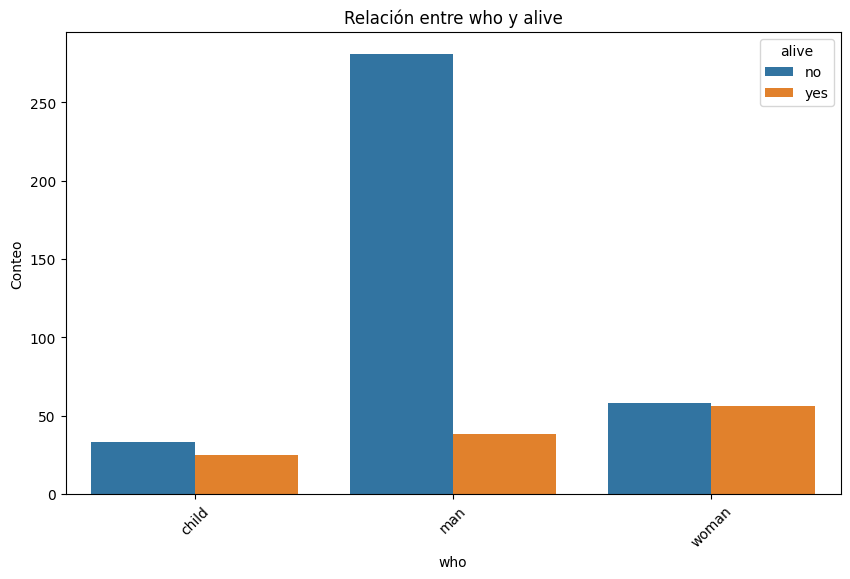

Respuesta First


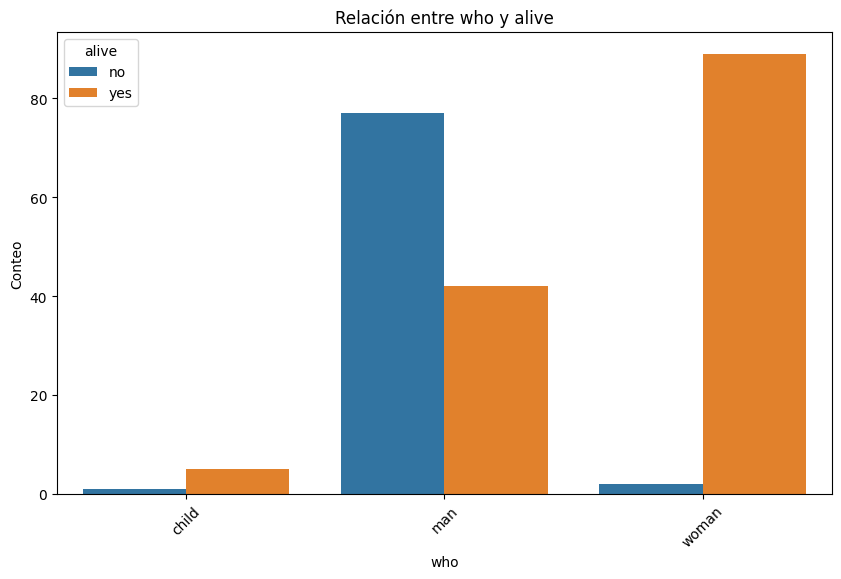

Respuesta Second


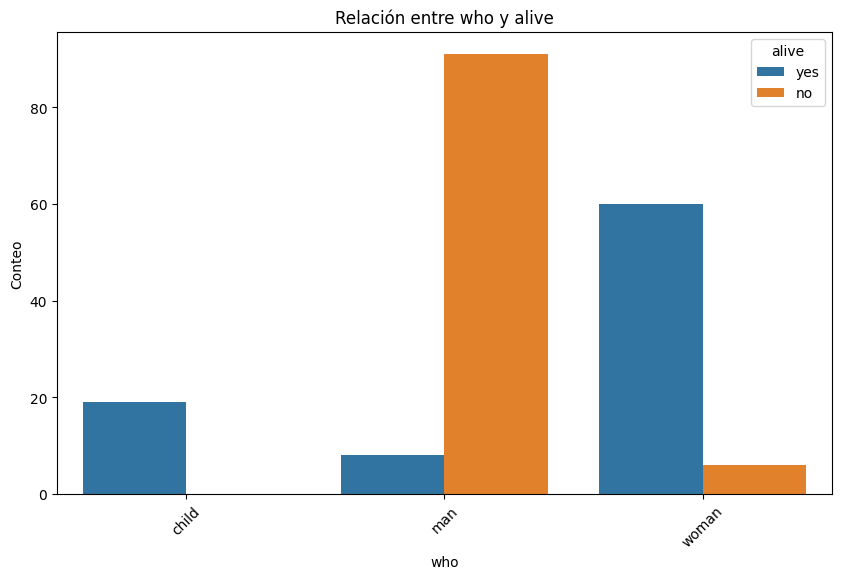

In [30]:
tricategorical_analysis(df_titanic,"class",["alive","who"])

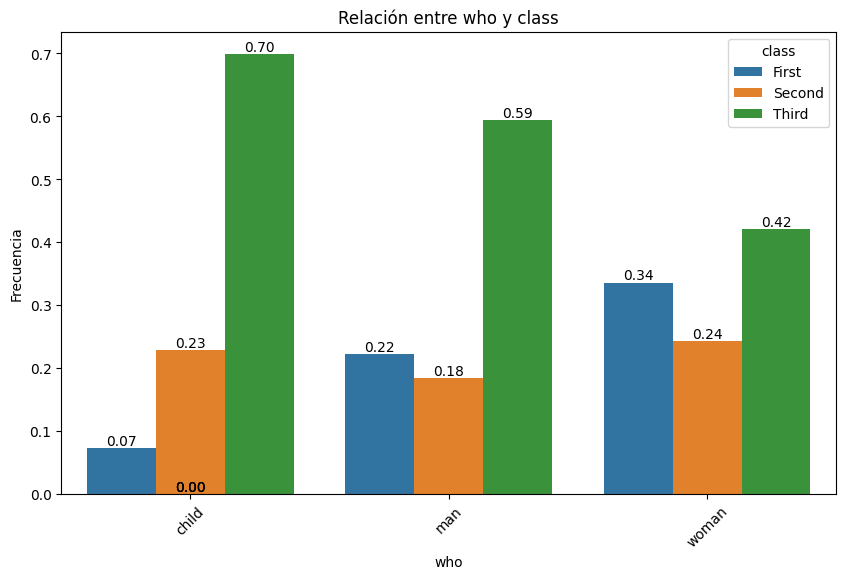

In [14]:
plot_categorical_relationship_fin(df_titanic,"who","class",relative_freq=True,show_values=True)

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

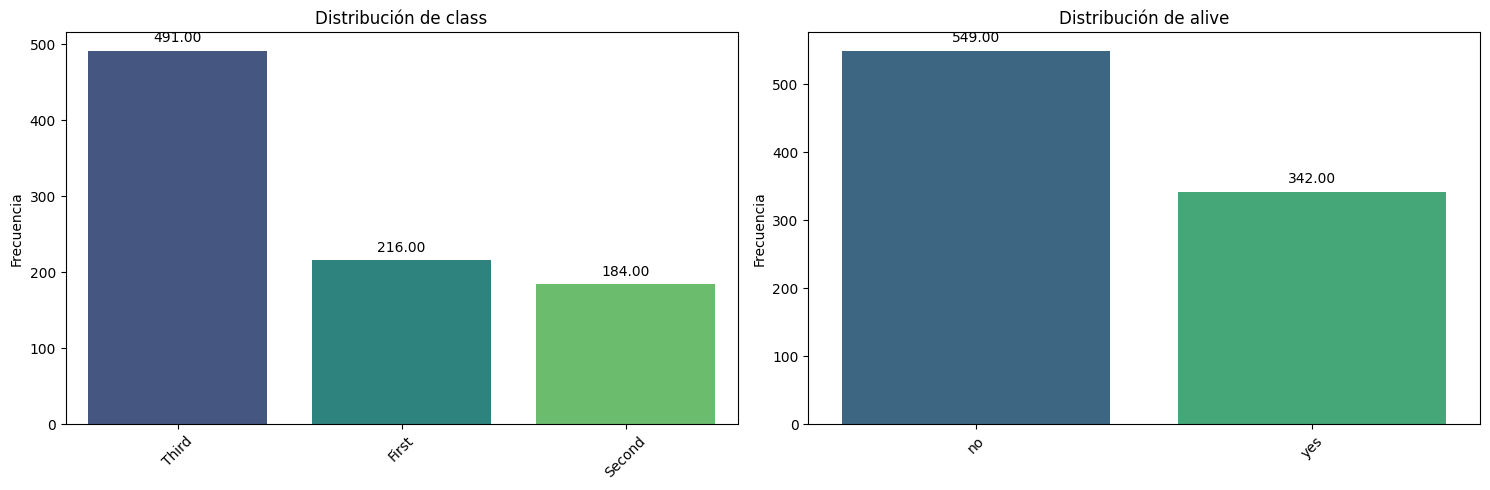

In [79]:
pinta_distribucion_categoricas(df_titanic,["class","alive"],mostrar_valores=True)

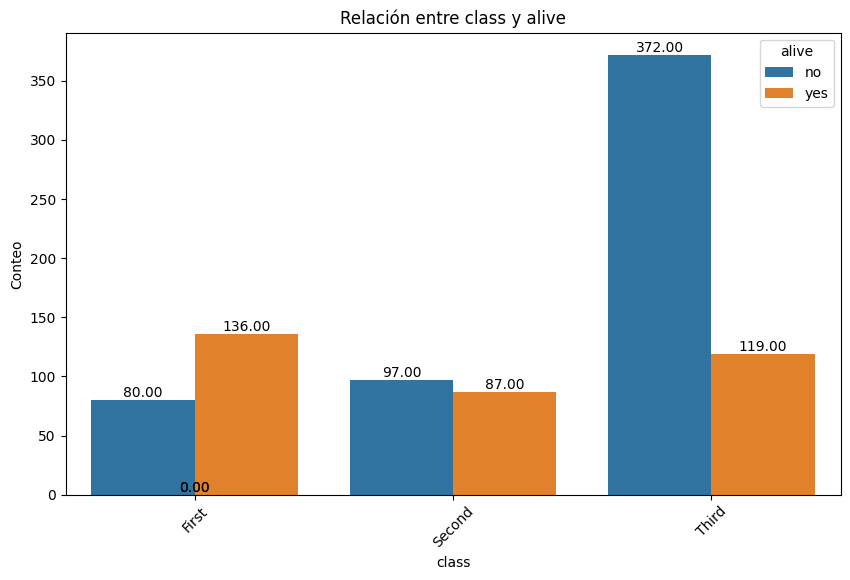

In [15]:
plot_categorical_relationship_fin(df_titanic,"class","alive",show_values=True)

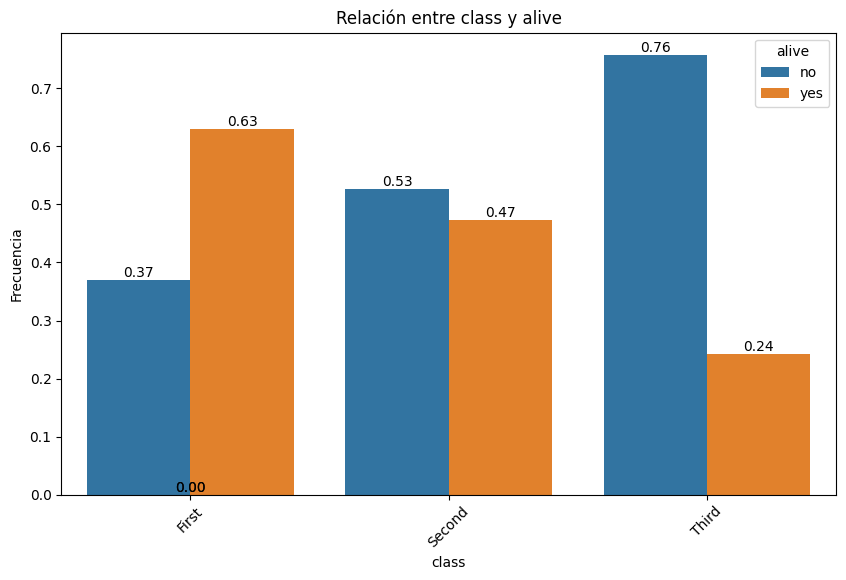

In [80]:
plot_categorical_relationship_fin(df_titanic,"class","alive",relative_freq=True,show_values=True)

In [86]:
tabla_contingencia_class = pd.crosstab(df_titanic["alive"],df_titanic["class"])
p_value = chi2_contingency(tabla_contingencia_class)[1]
p_value

np.float64(4.549251711298793e-23)

<span style="color:green">Remarkably, in the 3rd class is where there is the less possibility to survive. In the 2nd class is almost the same. And the first class is the class who have more possibilities to survive</span>

In [10]:
#Para comparar la relacion entre grupo de edad y sexo , variable who, y supervivencia.Empleamos un test chi2

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

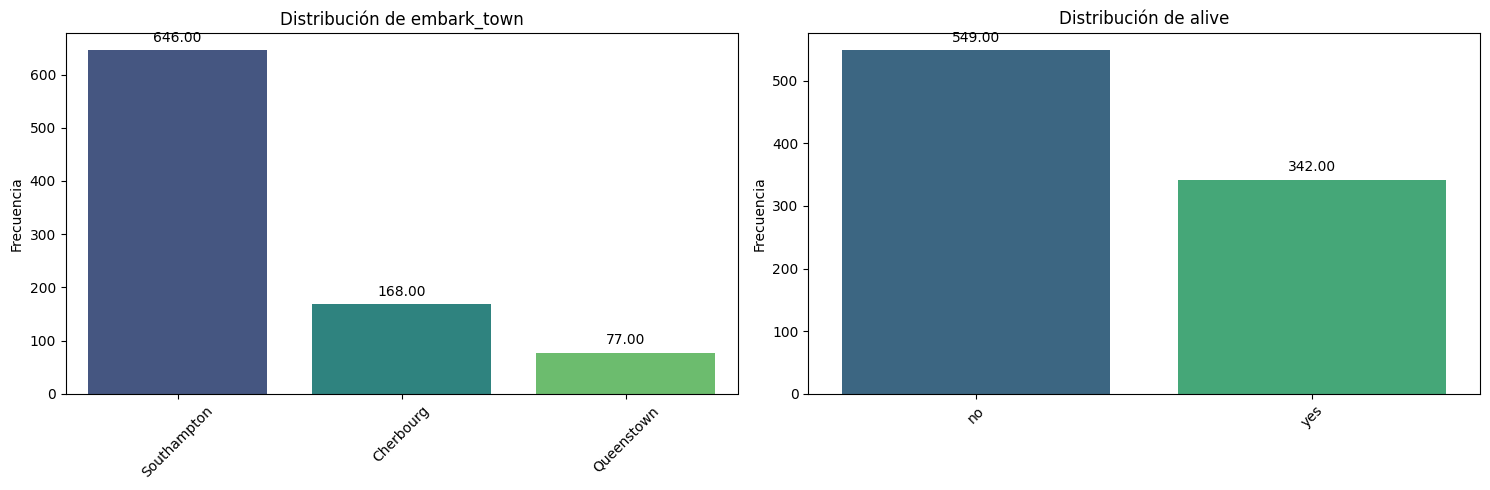

In [84]:
pinta_distribucion_categoricas(df_titanic,["embark_town","alive"],mostrar_valores=True)

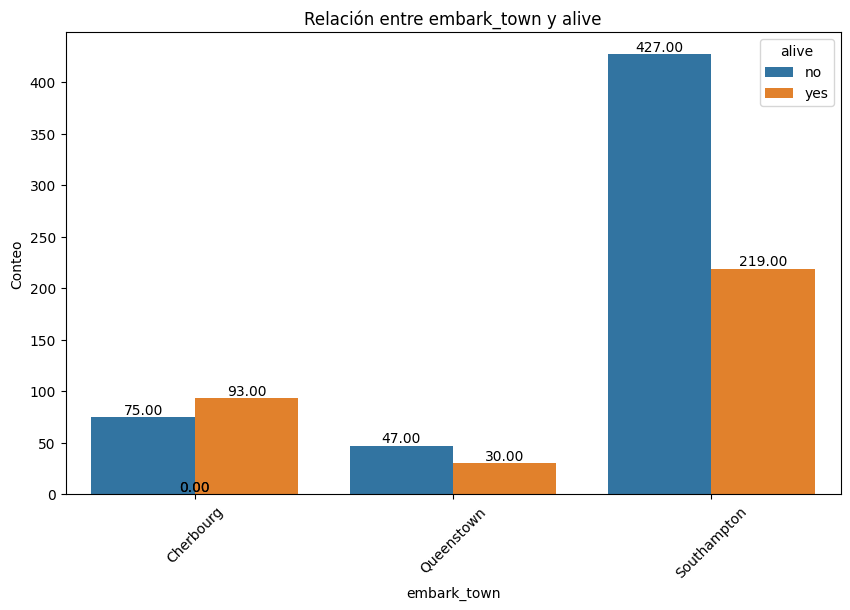

In [16]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",show_values=True)

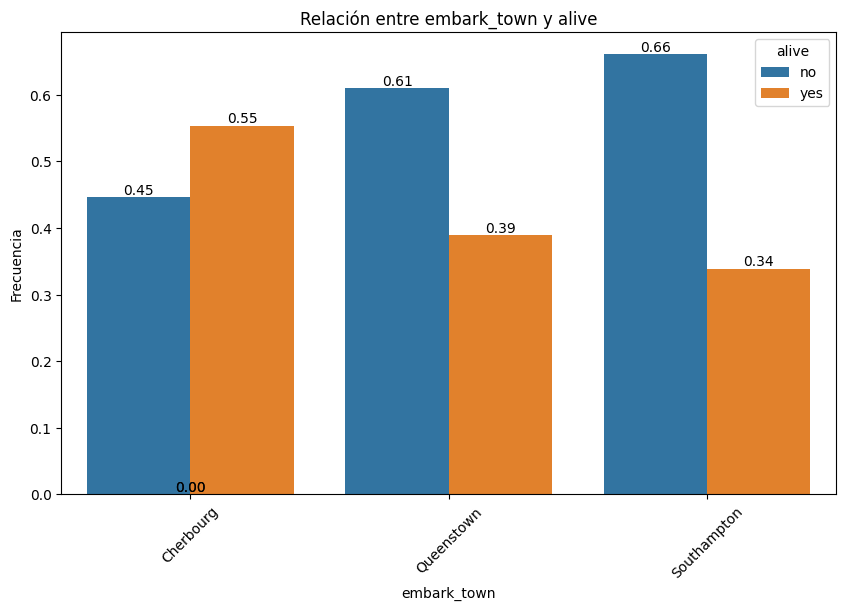

In [85]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive",relative_freq=True,show_values=True)

In [18]:
df_titanic.groupby("embark_town",as_index=False)["alive"].value_counts()

embark_town alive  count
0    Cherbourg   yes     93
1    Cherbourg    no     75
2   Queenstown    no     47
3   Queenstown   yes     30
4  Southampton    no    427
5  Southampton   yes    219

In [19]:
df_titanic.groupby("embark_town",as_index=False)["alive"].value_counts(normalize=True)

embark_town alive  proportion
0    Cherbourg   yes    0.553571
1    Cherbourg    no    0.446429
2   Queenstown    no    0.610390
3   Queenstown   yes    0.389610
4  Southampton    no    0.660991
5  Southampton   yes    0.339009

In [87]:
tabla_contingencia_town = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])
p_value = chi2_contingency(tabla_contingencia_town)[1]
p_value

np.float64(2.3008626481449577e-06)

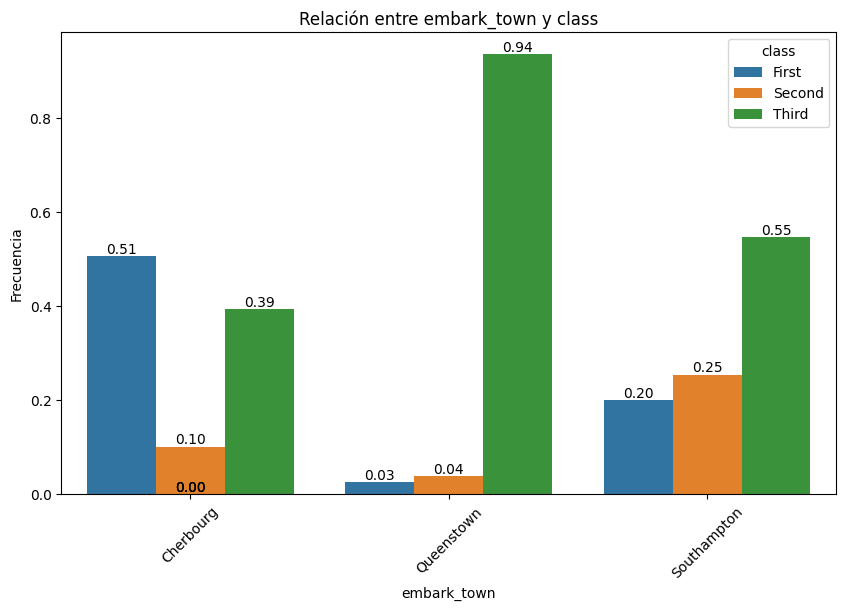

In [20]:
plot_categorical_relationship_fin(df_titanic,"embark_town","class",relative_freq=True,show_values=True)

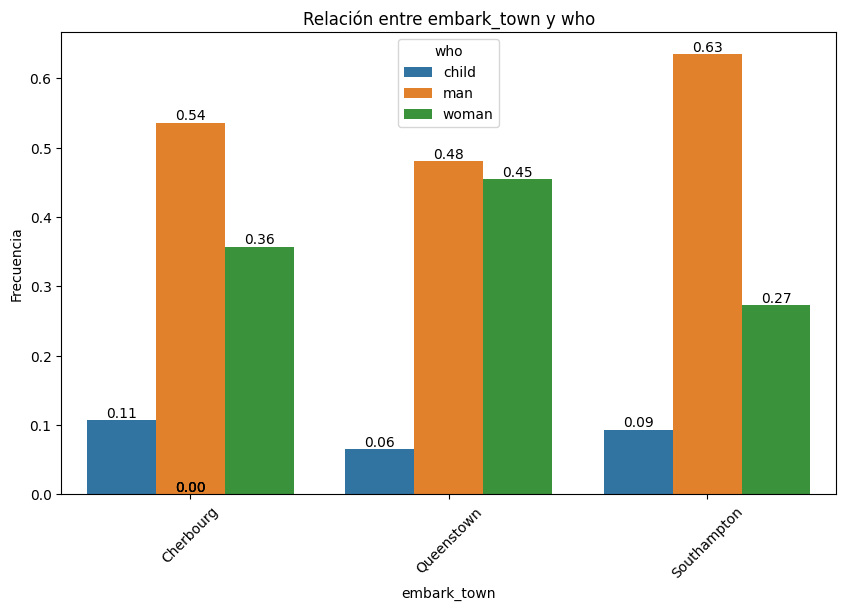

In [22]:
plot_categorical_relationship_fin(df_titanic,"embark_town","who",relative_freq=True,show_values=True)

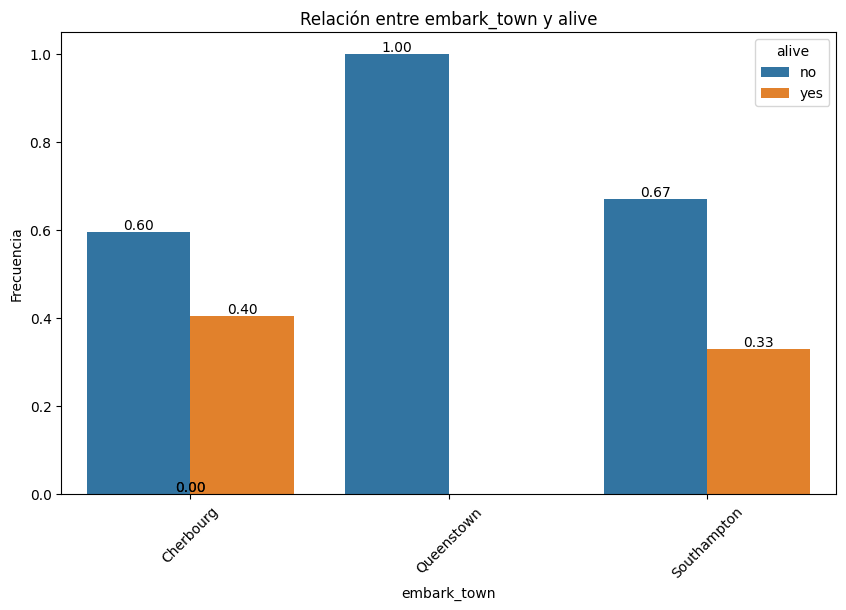

p-value 0.5403953078947801


In [24]:
df_test = df_titanic.loc[(df_titanic["who"]=="man") & (df_titanic["class"] == "First")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia)
print("p-value",p_value1)

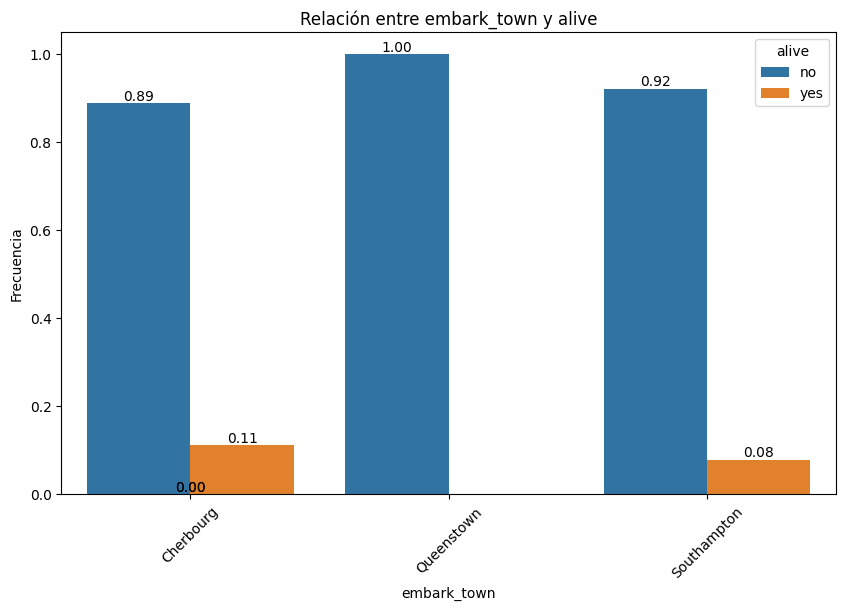

p-value 0.9026921075770808


In [25]:
df_test = df_titanic.loc[(df_titanic["who"]=="man") & (df_titanic["class"] == "Second")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_2 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_2)
print("p-value",p_value1)

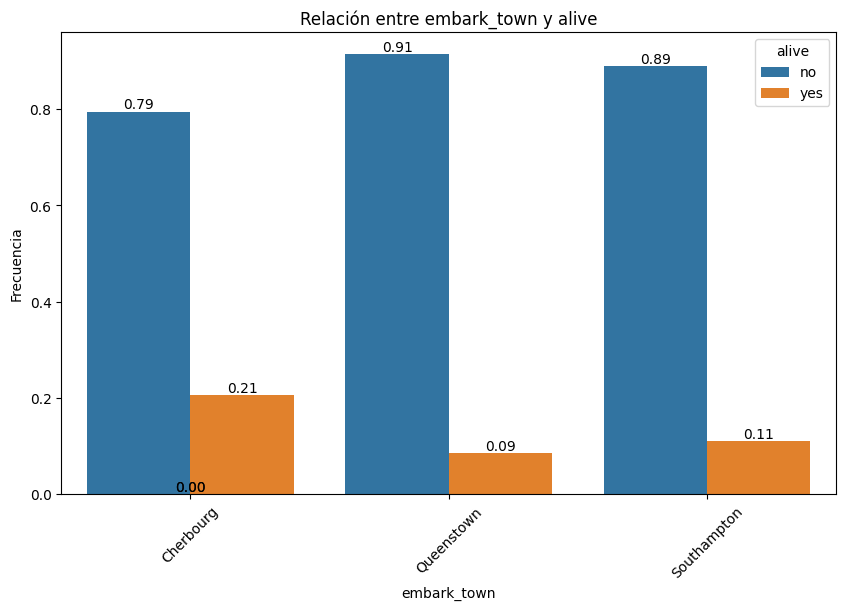

p-value 0.1913585459765817


In [26]:
df_test = df_titanic.loc[(df_titanic["who"]=="man") & (df_titanic["class"] == "Third")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_3 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_3)
print("p-value",p_value1)

In [28]:
#Tenemos independencia estadistica entre who y embarktown y class.
#Excepto para la clase y el puerto para los niños

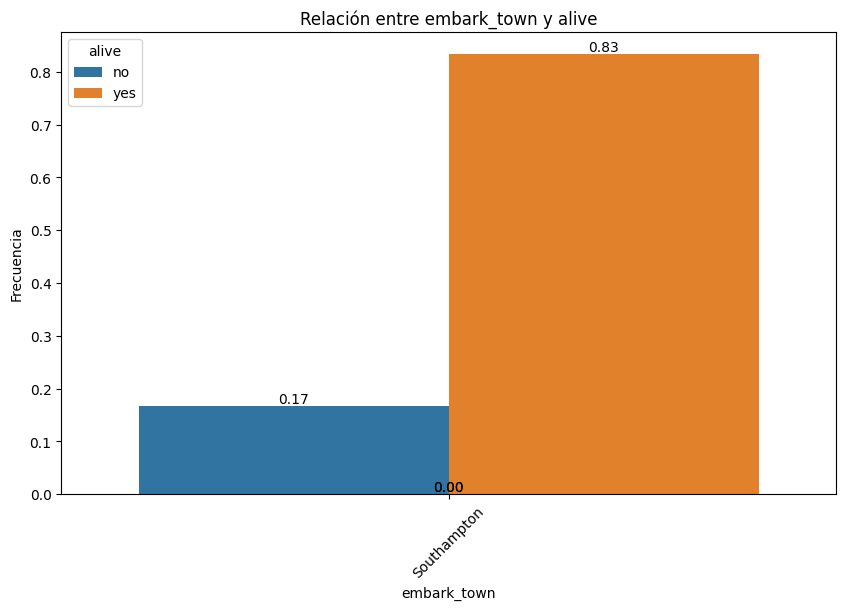

p-value 1.0


In [ ]:
df_test = df_titanic.loc[(df_titanic["who"]=="child") & (df_titanic["class"] == "First")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_3 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_3)
print("p-value",p_value1)

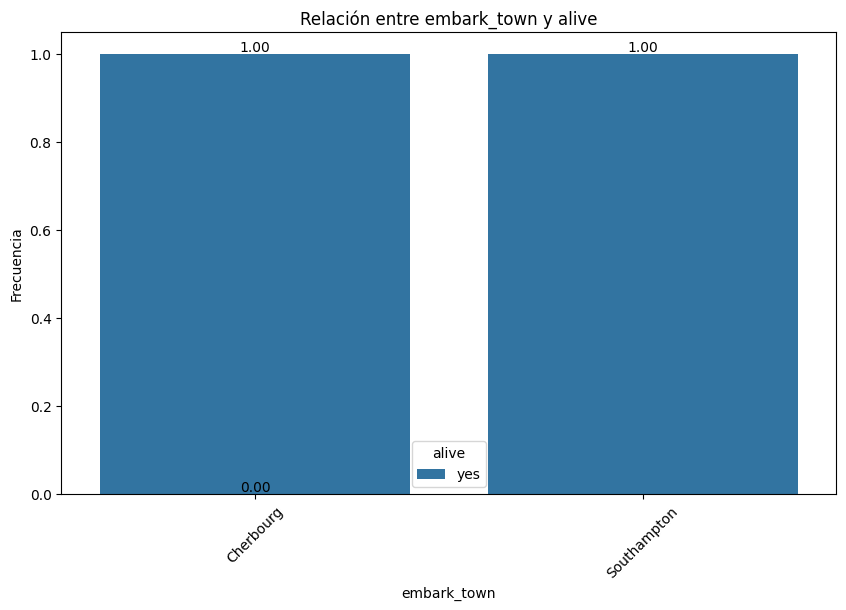

p-value 1.0


In [32]:
df_test = df_titanic.loc[(df_titanic["who"]=="child") & (df_titanic["class"] == "Second")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_3 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_3)
print("p-value",p_value1)

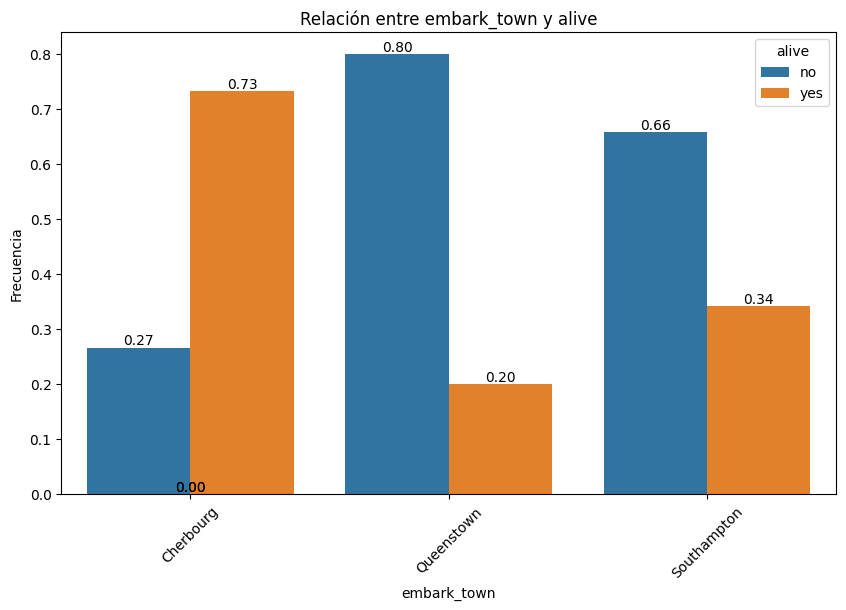

p-value 0.019225386540995867


In [33]:
df_test = df_titanic.loc[(df_titanic["who"]=="child") & (df_titanic["class"] == "Third")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_3 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_3)
print("p-value",p_value1)

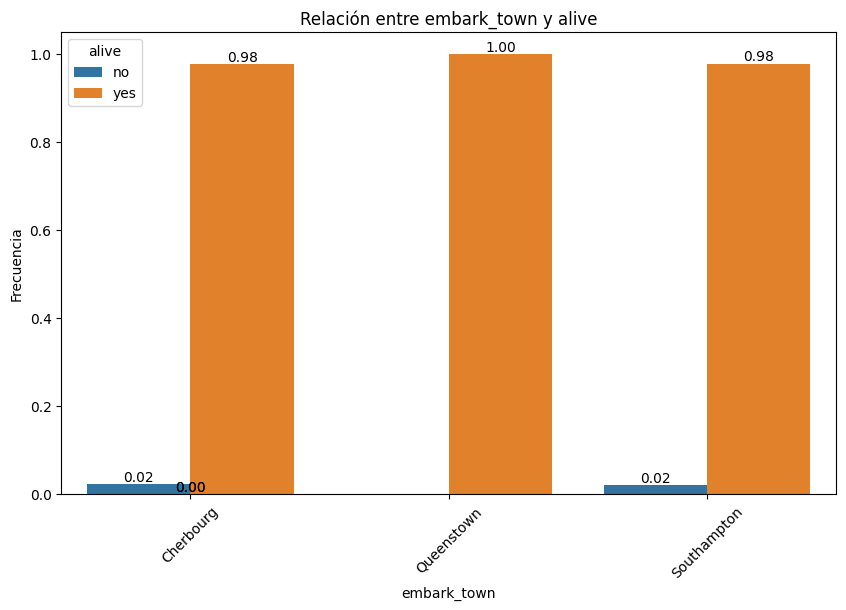

p-value 0.9866824937243175


In [34]:
df_test = df_titanic.loc[(df_titanic["who"]=="woman") & (df_titanic["class"] == "First")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_3 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_3)
print("p-value",p_value1)

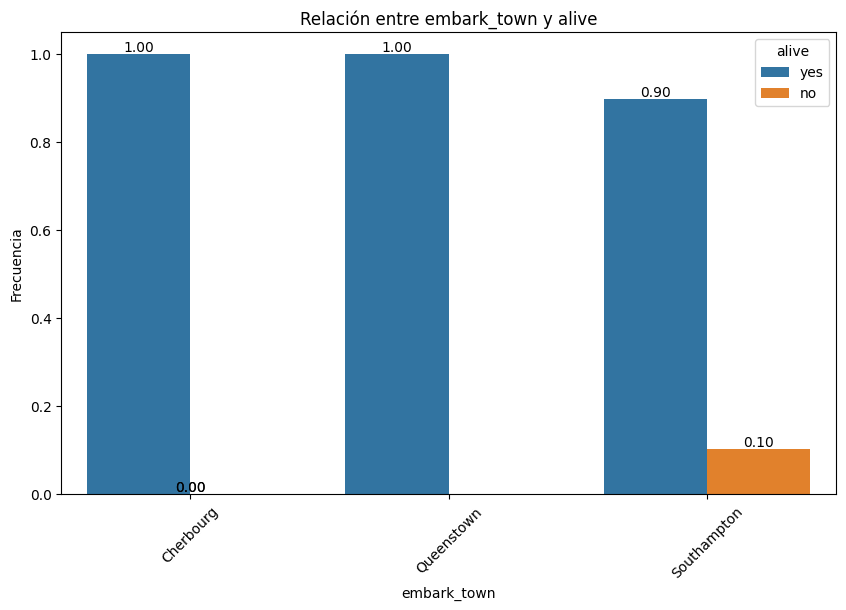

p-value 0.6760248632034247


In [35]:
df_test = df_titanic.loc[(df_titanic["who"]=="woman") & (df_titanic["class"] == "Second")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_3 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_3)
print("p-value",p_value1)

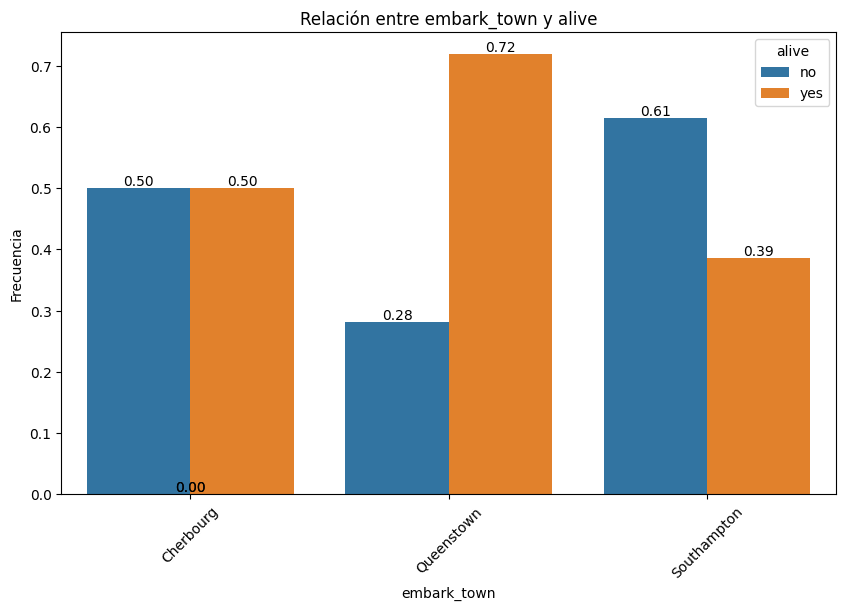

p-value 0.007634880139676012


In [36]:
df_test = df_titanic.loc[(df_titanic["who"]=="woman") & (df_titanic["class"] == "Third")].copy()
plot_categorical_relationship_fin(df_test,"embark_town","alive",relative_freq=True,show_values=True)

tabla_contingencia_3 = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2,p_value1,dof,expected = chi2_contingency(tabla_contingencia_3)
print("p-value",p_value1)

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

(2,)


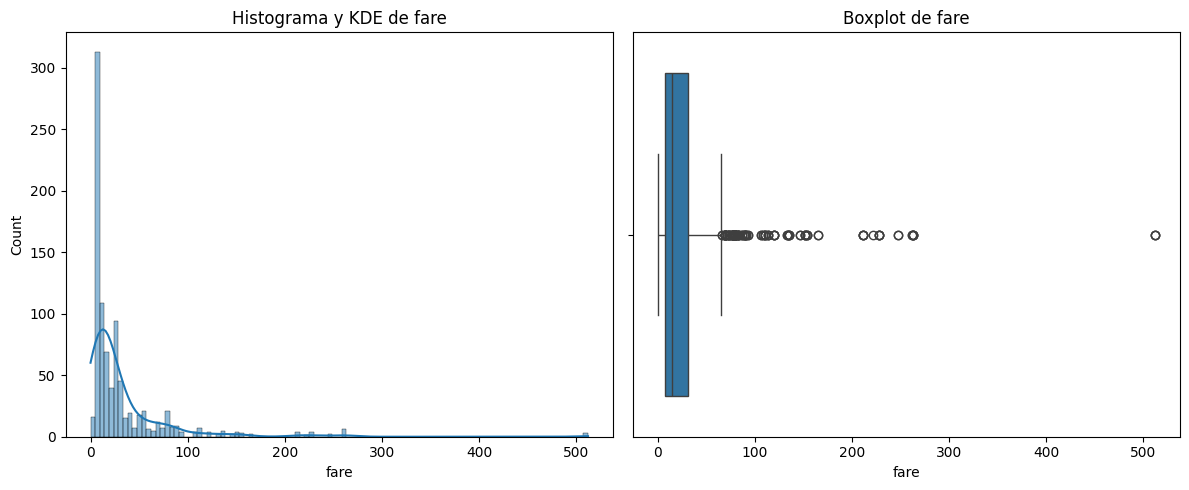

In [ ]:
plot_combined_graphs(df_titanic,["fare"])

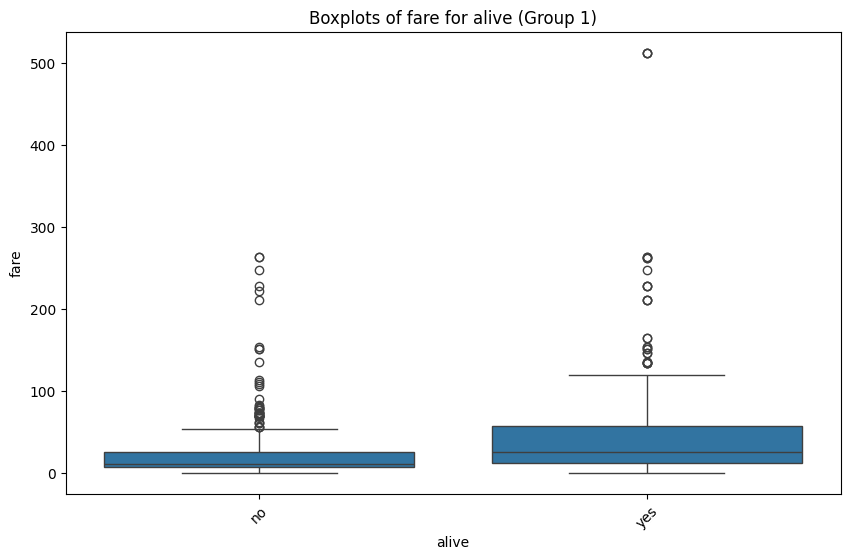

In [37]:
plot_grouped_boxplots(df_titanic,"alive","fare")

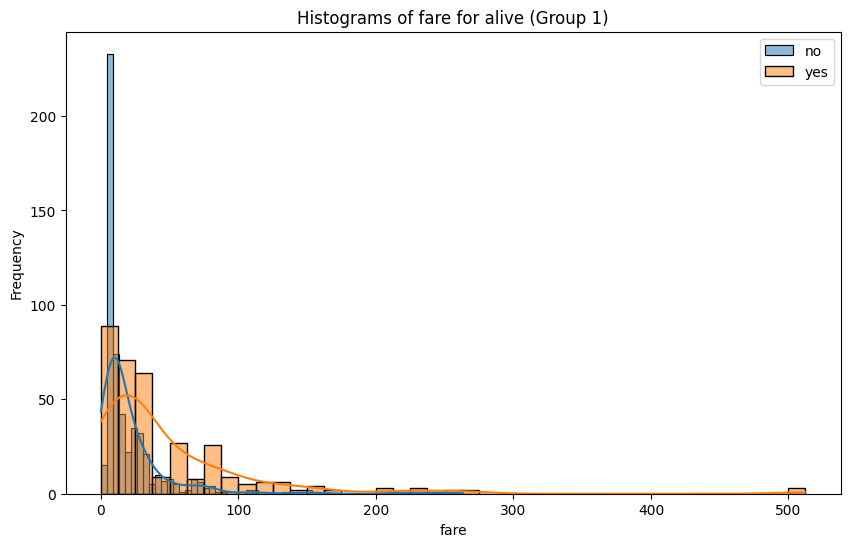

In [96]:
plot_grouped_histograms(df_titanic,"alive","fare",group_size=2)

In [98]:
from scipy.stats import mannwhitneyu
var_1 = df_titanic.loc[df_titanic["alive"]=="no","fare"]
var_2 = df_titanic.loc[df_titanic["alive"]=="yes","fare"]
u,valor_p = mannwhitneyu(var_1,var_2)
valor_p

np.float64(4.553477179250237e-22)

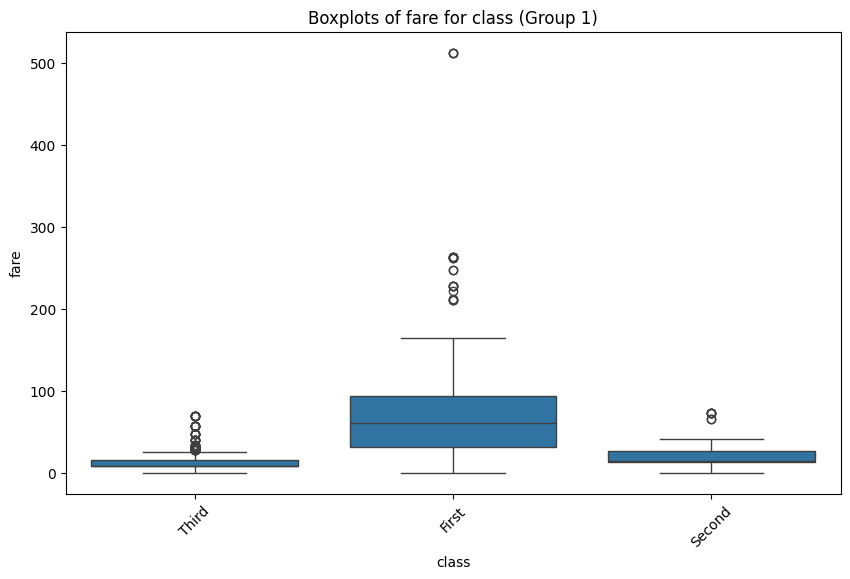

In [29]:
plot_grouped_boxplots(df_titanic,"class","fare")

In [38]:
df_alive = df_titanic.loc[df_titanic["alive"] == "yes"].copy()
df_dead = df_titanic.loc[df_titanic["alive"] == "no"].copy()

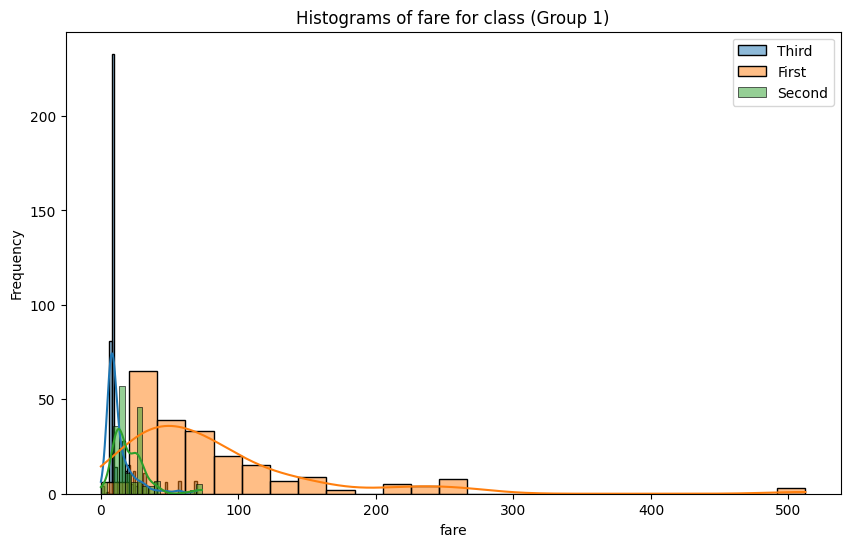

In [39]:
plot_grouped_histograms(df_titanic,"class","fare",group_size=3)

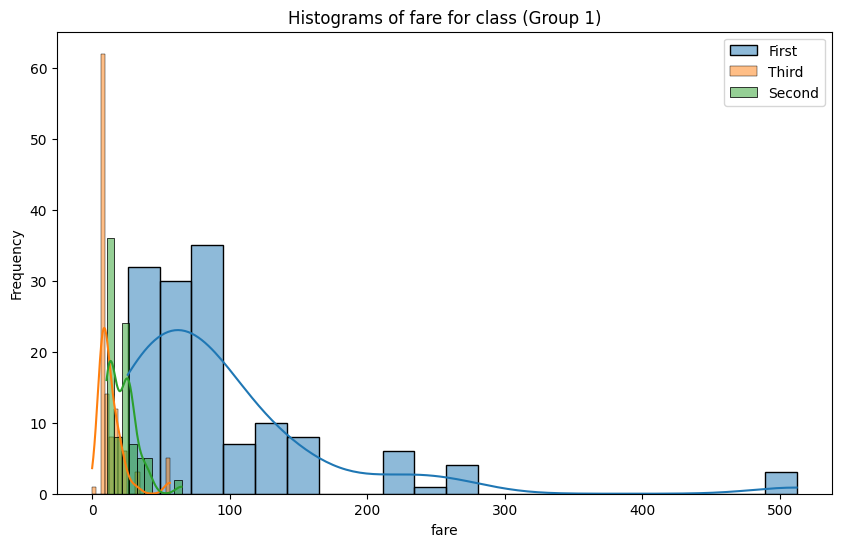

In [40]:
plot_grouped_histograms(df_alive,"class","fare",group_size=3)

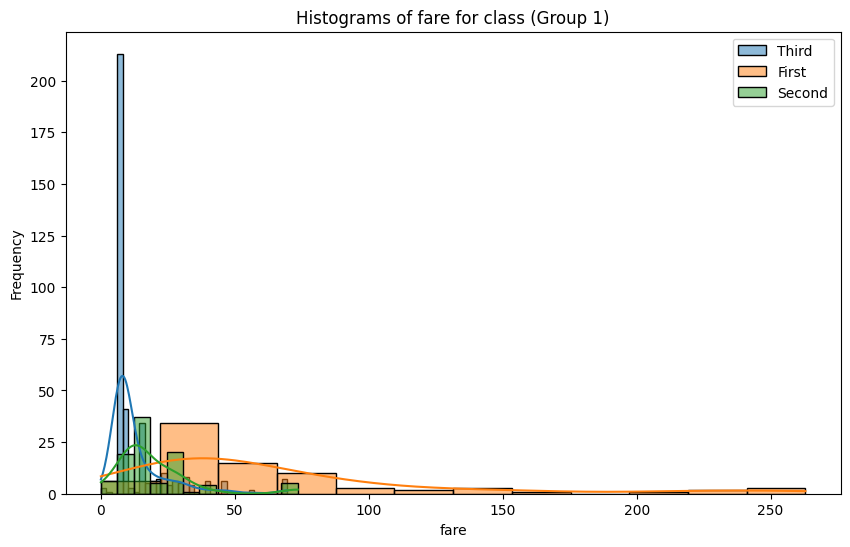

In [41]:
plot_grouped_histograms(df_dead,"class","fare",group_size=3)

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [42]:
df_titanic.loc[df_titanic["fare"]==0]

sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
732  male  33.173123   0.0  Second  man        True  Southampton    no   True   
806  male  39.000000   0.0   First  man        True  Southampton    no   True   
815  male  33.173123   0.0   First  man        True  Southampton    no   True   
822  male  38.000000   0.0   First  man        True  Southampton    no   True   

     family_members  
179               0  
263               0  
271               0  
277               0  
302               0  
413               0  
466               0  
481               0  
597               0  
633               0  
674               0  
732               0  
806               0  
815               0  
822               0

In [43]:
df_titanic.loc[df_titanic["fare"] == df_titanic["fare"].max()]

sex   age      fare  class    who  adult_male embark_town alive  \
258  female  35.0  512.3292  First  woman       False   Cherbourg   yes   
679    male  36.0  512.3292  First    man        True   Cherbourg   yes   
737    male  35.0  512.3292  First    man        True   Cherbourg   yes   

     alone  family_members  
258   True               0  
679  False               1  
737   True               0

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


In [46]:
def trivariant_analysis(df,directora,cat2,num1,relativa=False,group_size = 3,bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    dicc = {}
    for valor in df[col_directora].unique():
        dicc[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

    for valor,df_datos in dicc.items():
        print(f"Respuesta {valor}")
        plot_grouped_histograms(df_datos,col_1,col_2,group_size = group_size,bins = bins)

Respuesta Southampton


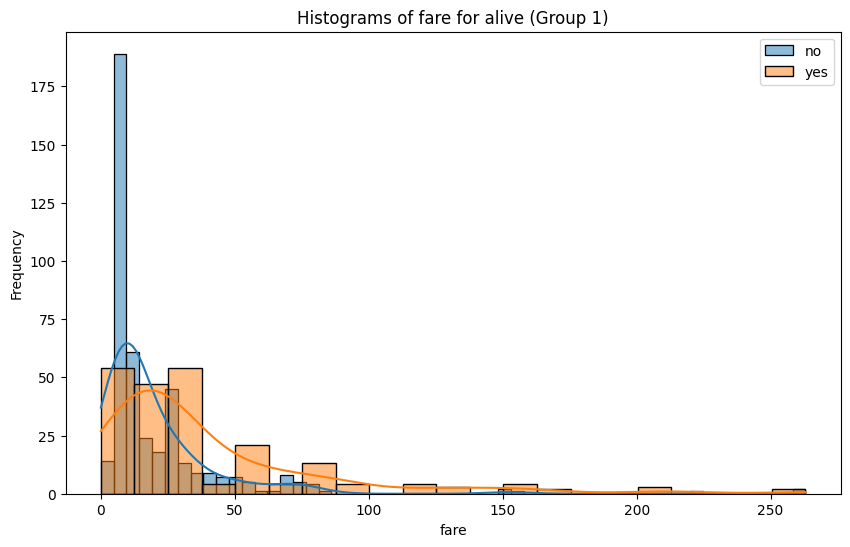

Respuesta Cherbourg


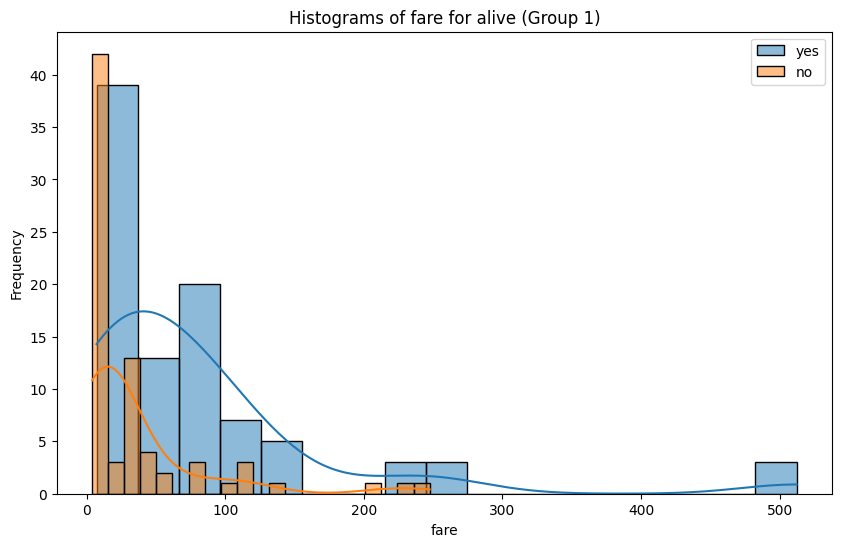

Respuesta Queenstown


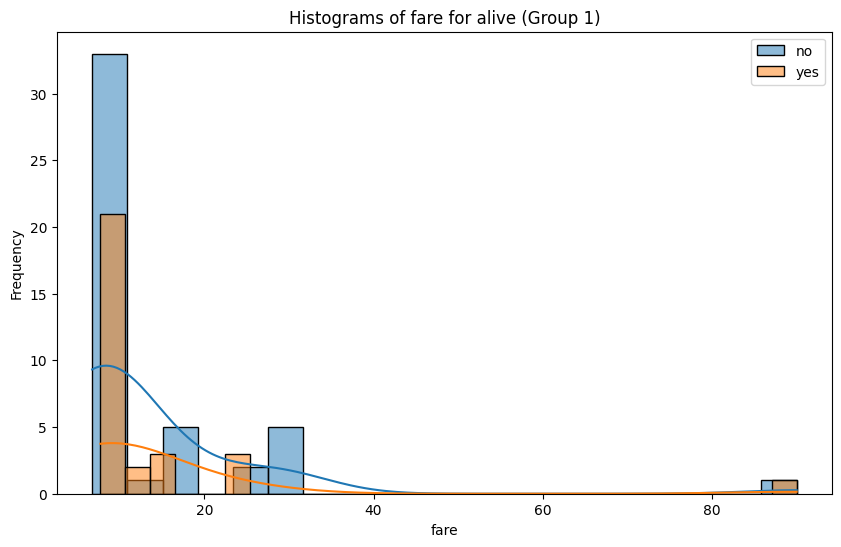

In [47]:
trivariant_analysis(df_titanic,"embark_town","alive","fare",2,30)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

(2,)


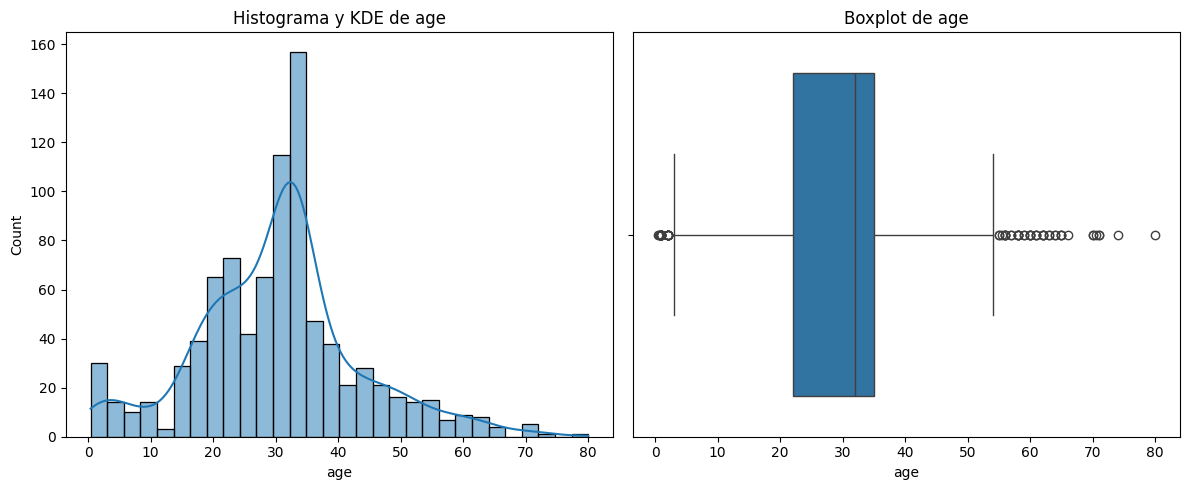

In [48]:
plot_combined_graphs(df_titanic,["age"])

In [49]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [50]:
bins = [0,22,32,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic.age,bins = bins,labels = ["age_1","age_2","age_3","age_4"])

Respuesta age_1


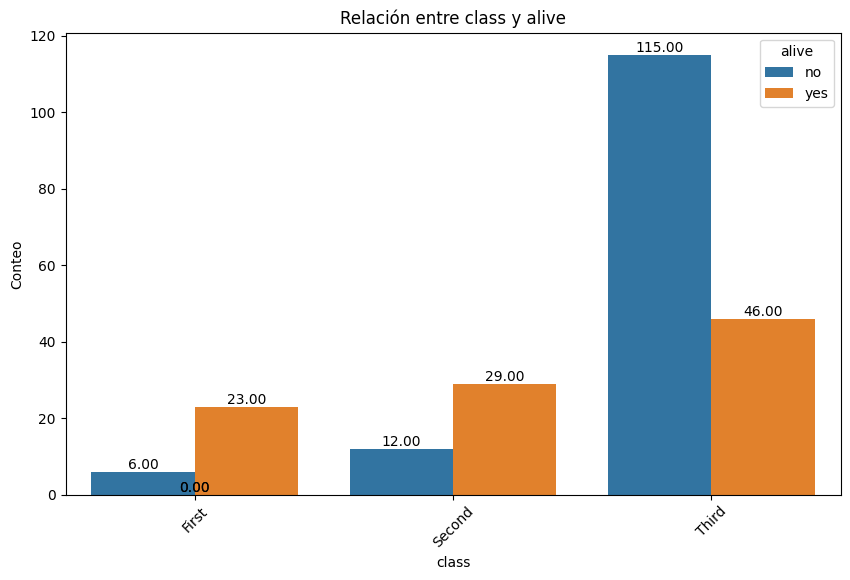

Respuesta age_4


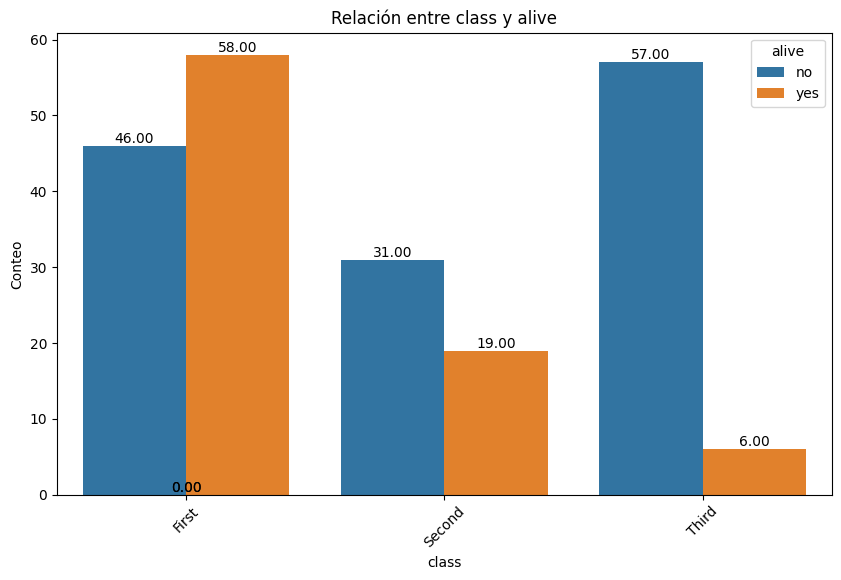

Respuesta age_2


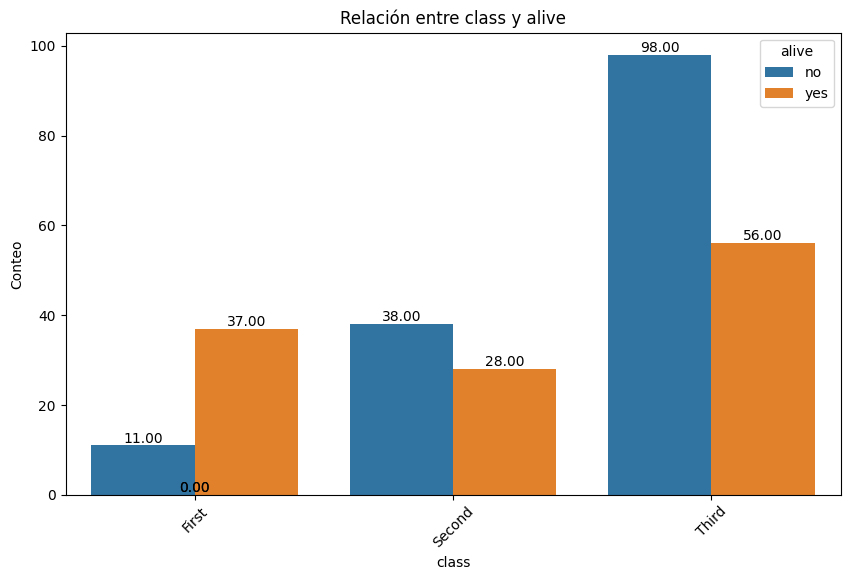

Respuesta age_3


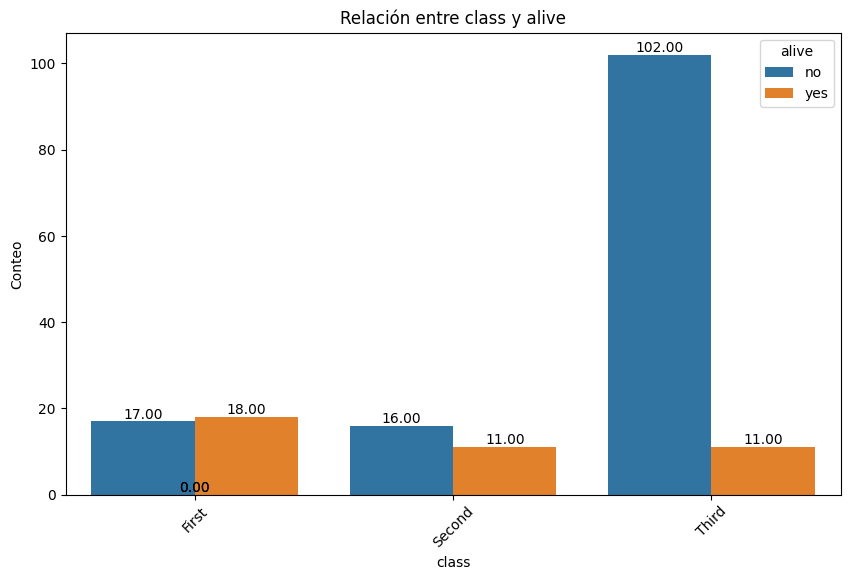

In [51]:
tricategorical_analysis(df=df_titanic,directora="cat_age",otras=["alive","class"],muetra_valores=True)

Respuesta age_1


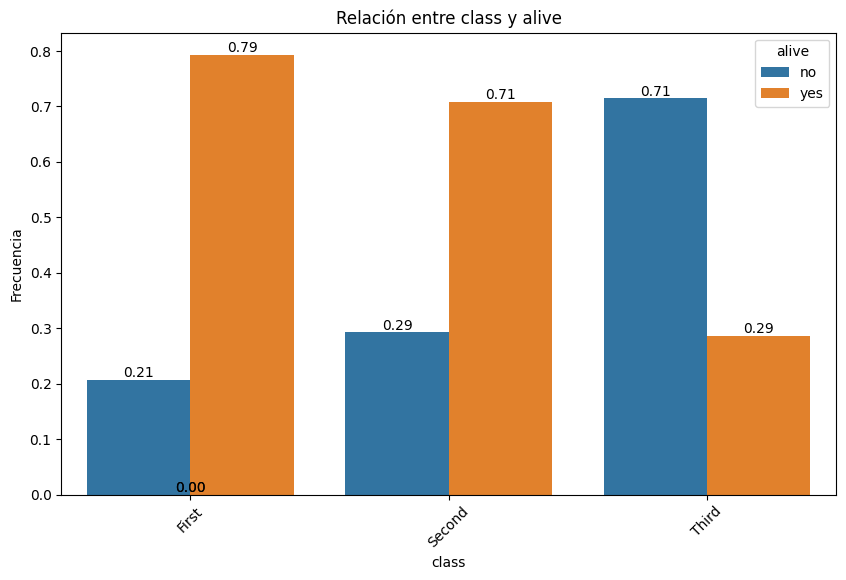

Respuesta age_4


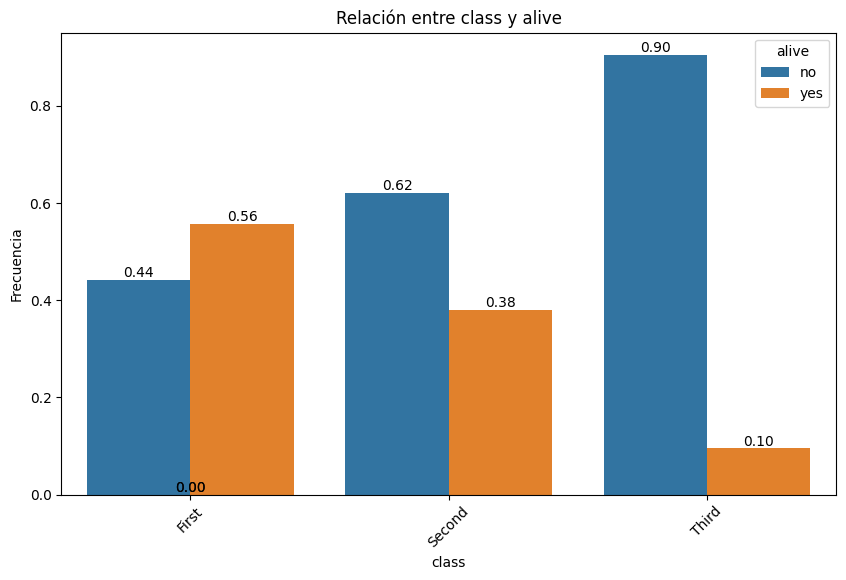

Respuesta age_2


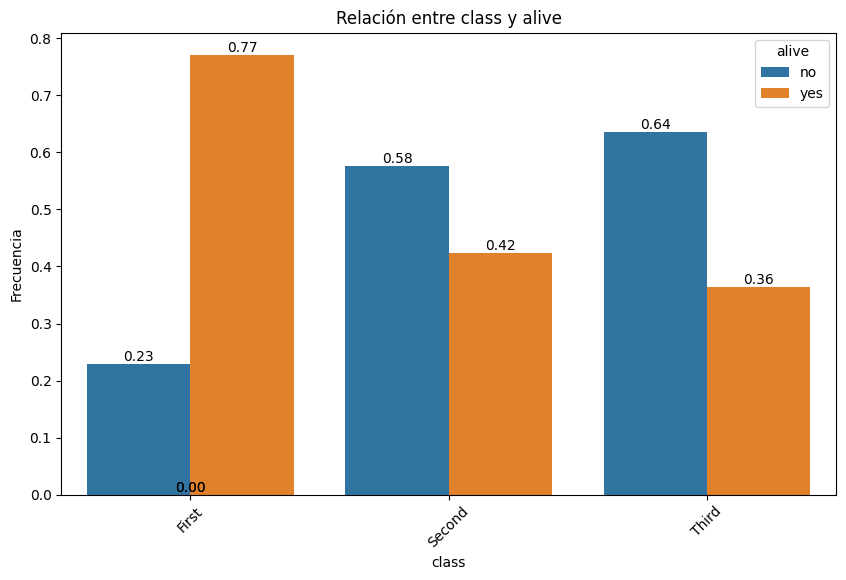

Respuesta age_3


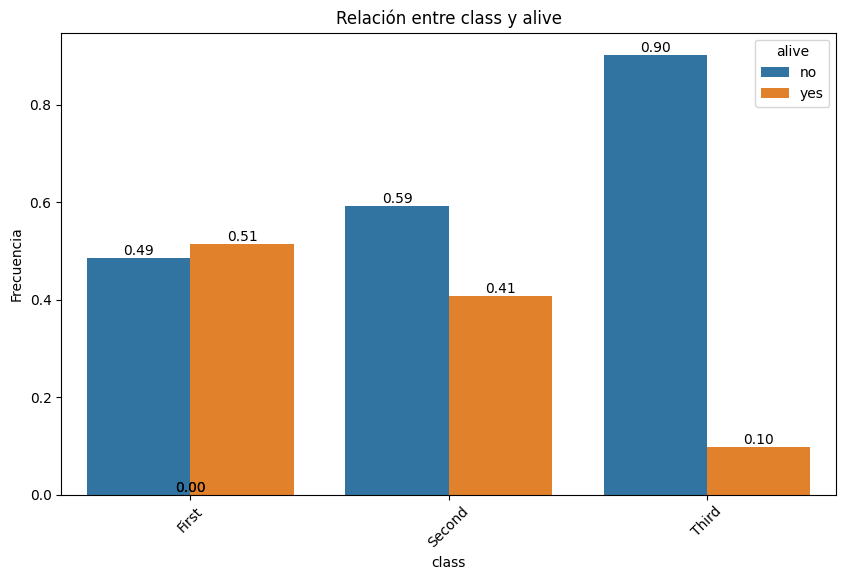

In [52]:
tricategorical_analysis(df=df_titanic,directora="cat_age",otras=["alive","class"],relativa=True,muetra_valores=True)

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [53]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
dicc_multivariante = {}
for valor in df_titanic[col_directora].unique():
    dicc_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no


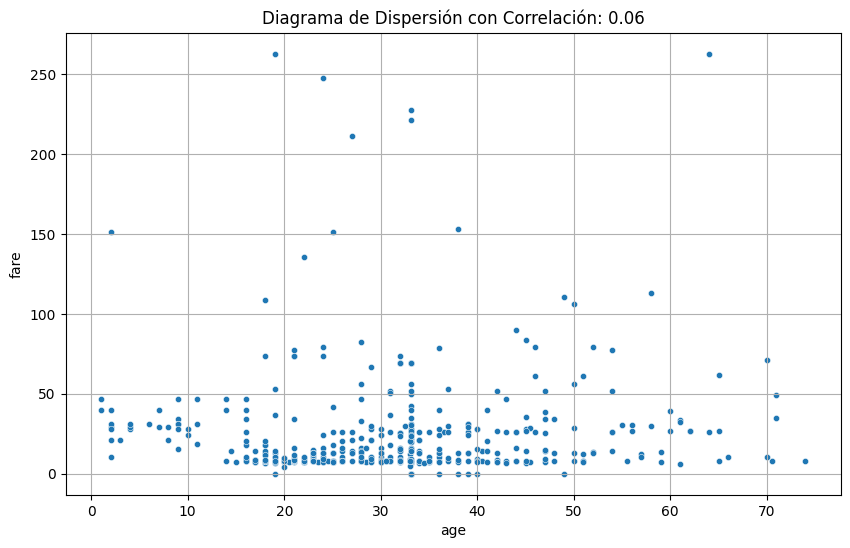

Respuesta yes


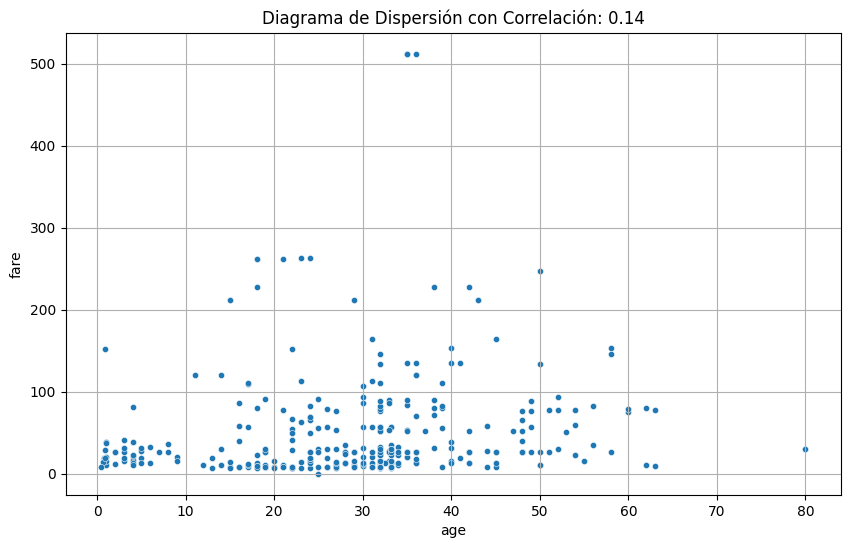

In [54]:
for valor,df_datos in dicc_multivariante.items():
    print(f"Respuesta {valor}")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1,tamano_puntos=20,mostrar_correlacion=True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [55]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun.csv")

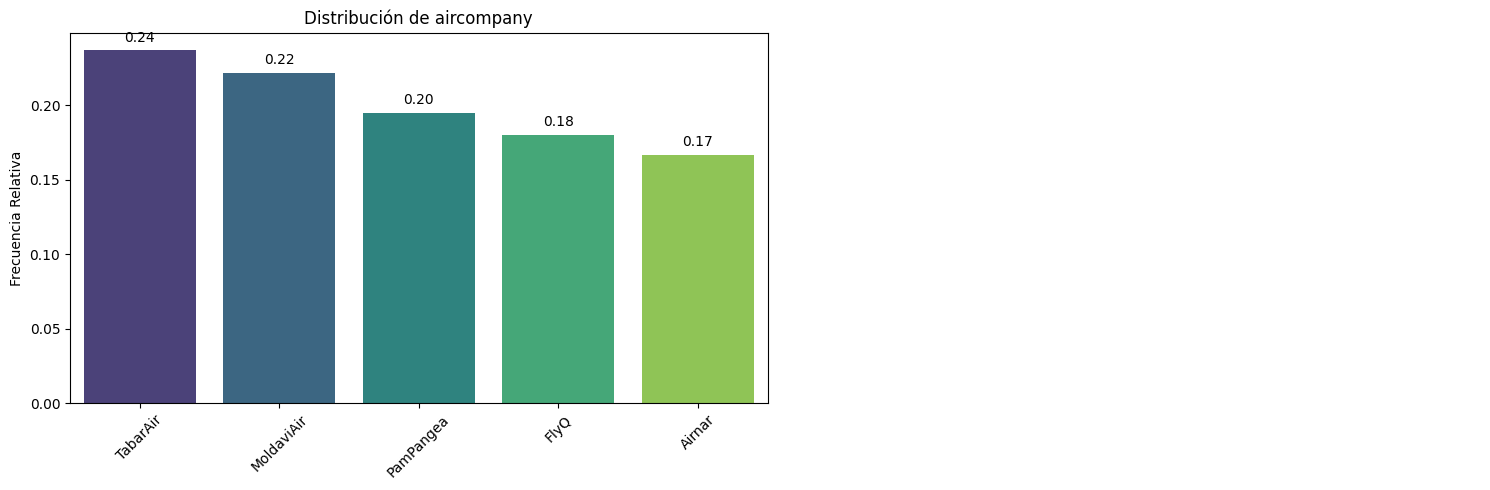

In [56]:
pinta_distribucion_categoricas(df_viajes,["aircompany"],relativa=True,mostrar_valores=True)

(2,)


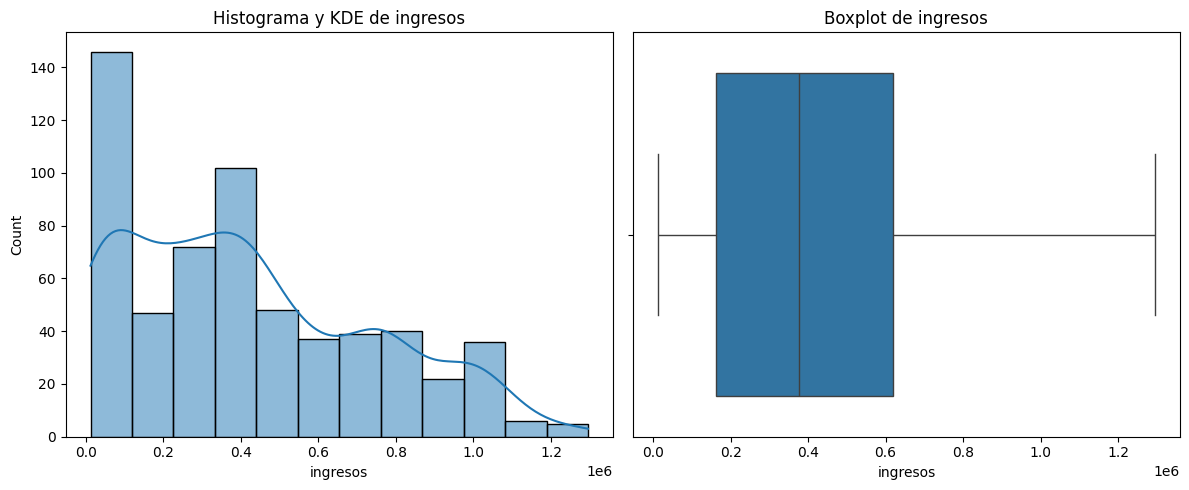

In [57]:
plot_combined_graphs(df_viajes,["ingresos"])

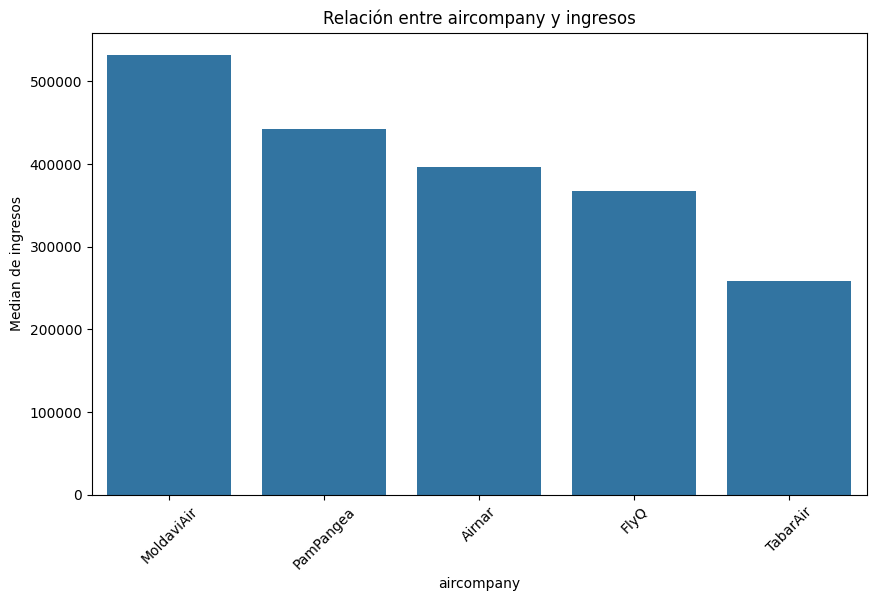

In [58]:
plot_categorical_numerical_relationship(df_viajes,"aircompany","ingresos",measure="median")

In [59]:
df_viajes.groupby("aircompany")["ingresos"].sum().sort_values()

aircompany
TabarAir      38487996.70
Airnar        40529397.82
FlyQ          43374852.87
PamPangea     55974794.70
MoldaviAir    72894268.81
Name: ingresos, dtype: float64

In [60]:
df_viajes.groupby("aircompany")["ingresos"].apply(lambda row: row.sum()/len(row))

aircompany
Airnar        405293.978200
FlyQ          401619.008056
MoldaviAir    548077.209098
PamPangea     478417.048718
TabarAir      271042.230282
Name: ingresos, dtype: float64

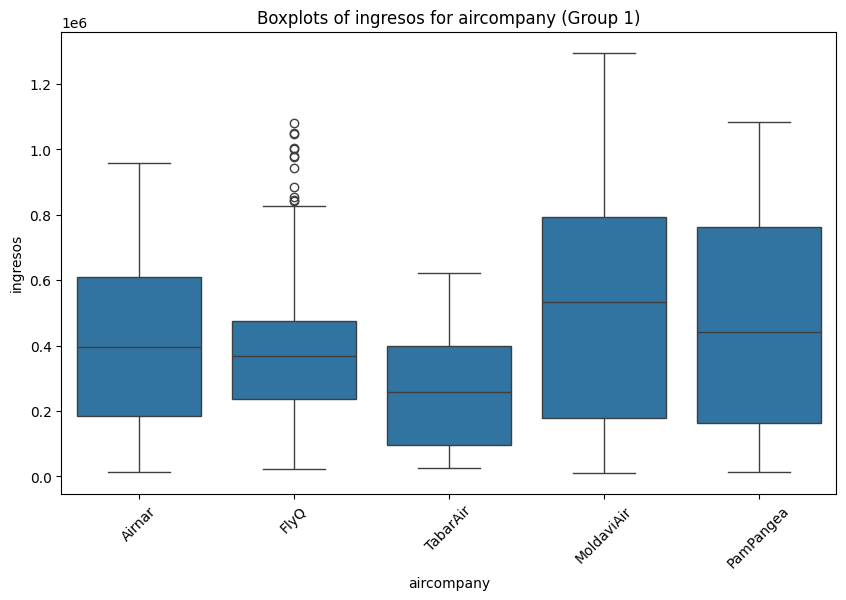

In [61]:
plot_grouped_boxplots(df_viajes,"aircompany","ingresos")

In [62]:
df_viajes.groupby("aircompany").agg({"ingresos":"sum","destino":len})

ingresos  destino
aircompany                      
Airnar      40529397.82      100
FlyQ        43374852.87      108
MoldaviAir  72894268.81      133
PamPangea   55974794.70      117
TabarAir    38487996.70      142

In [63]:
df = df_viajes.groupby("aircompany").agg({"ingresos":"sum","destino":len})
(df["ingresos"]/df["destino"]).sort_values(ascending=False)

aircompany
MoldaviAir    548077.209098
PamPangea     478417.048718
Airnar        405293.978200
FlyQ          401619.008056
TabarAir      271042.230282
dtype: float64

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

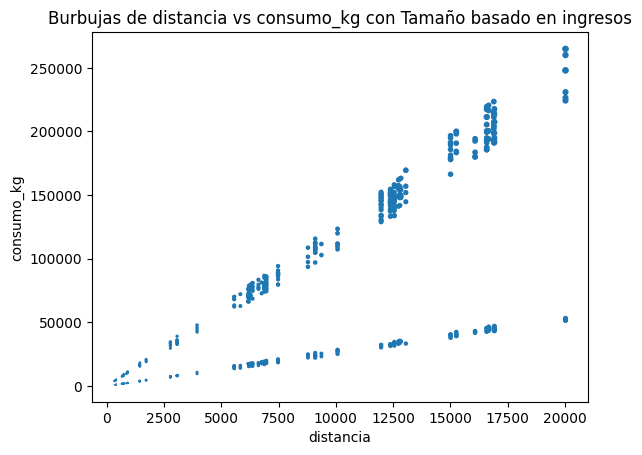

In [64]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos",scale=100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


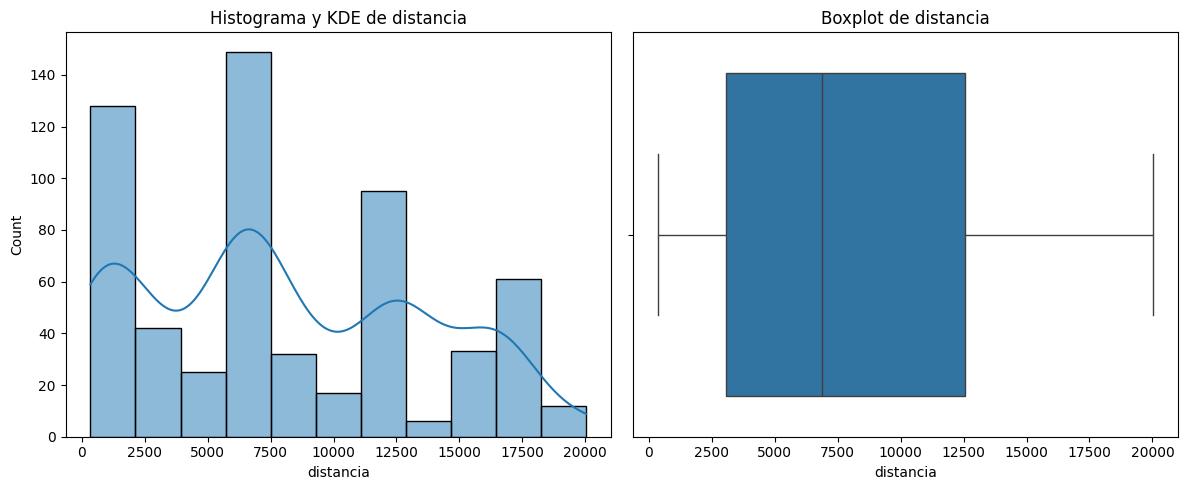

In [65]:
plot_combined_graphs(df_viajes,["distancia"])

In [67]:
df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"],bins = [0,5500,11000,16000,df_viajes["distancia"].max()],labels = ["cat1","cat2","cat3","cat4"])

In [68]:
df_viajes["cat_vuelo"].value_counts()

cat_vuelo
cat2    217
cat1    176
cat3    127
cat4     80
Name: count, dtype: int64

In [69]:
pd.crosstab(df_viajes["aircompany"],df_viajes["cat_vuelo"])

cat_vuelo   cat1  cat2  cat3  cat4
aircompany                        
Airnar        31    37    32     0
FlyQ          24    50    25     9
MoldaviAir    34    19    51    29
PamPangea     33    23    19    42
TabarAir      54    88     0     0

In [71]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
dicc_multivariante = {}
for valor in df_viajes[col_directora].unique():
    dicc_multivariante[valor] = df_viajes.loc[df_viajes[col_directora] == valor,[col_2,col_1]]

Respuesta cat1


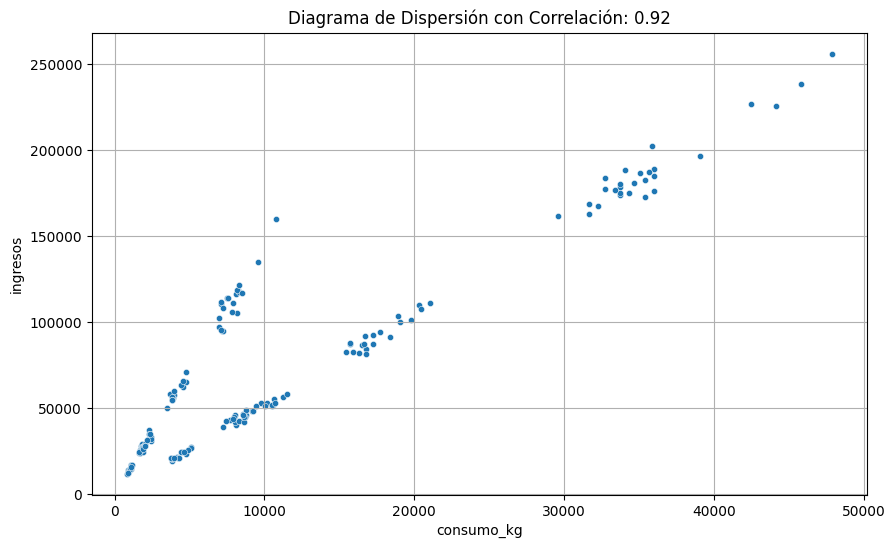

Respuesta cat3


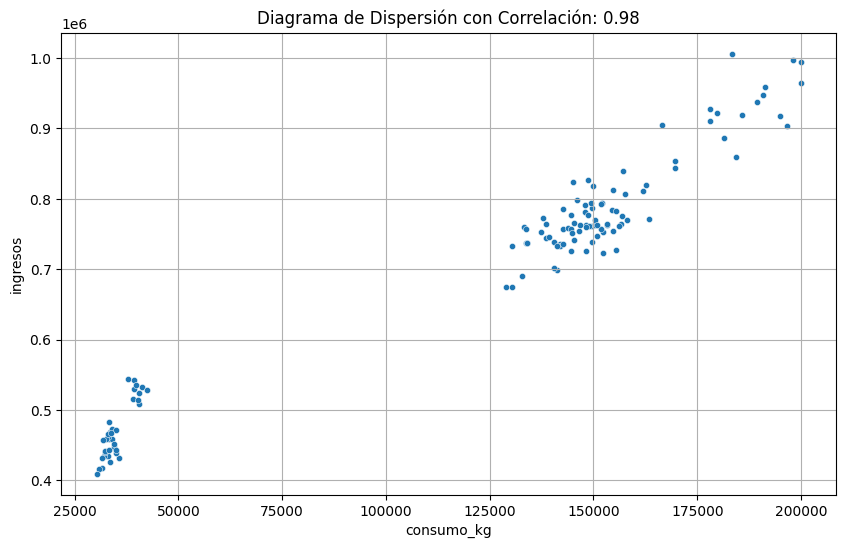

Respuesta cat2


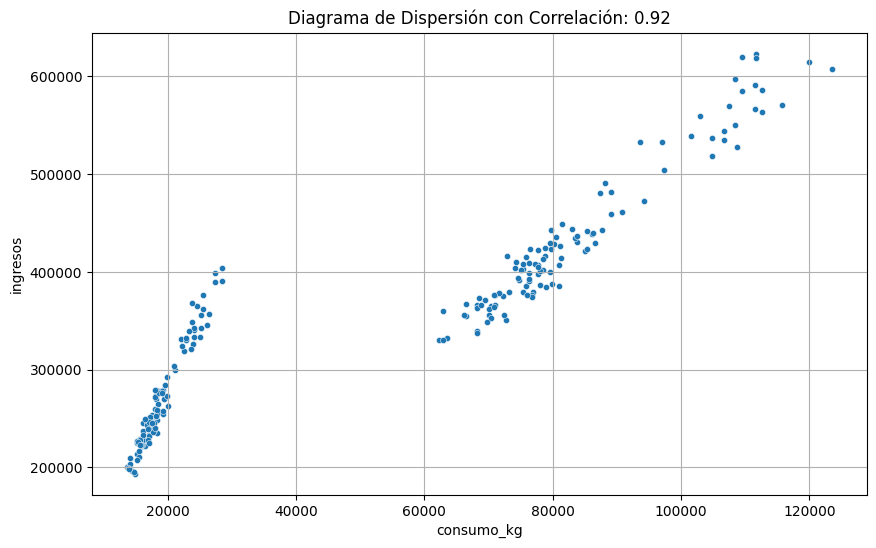

Respuesta cat4


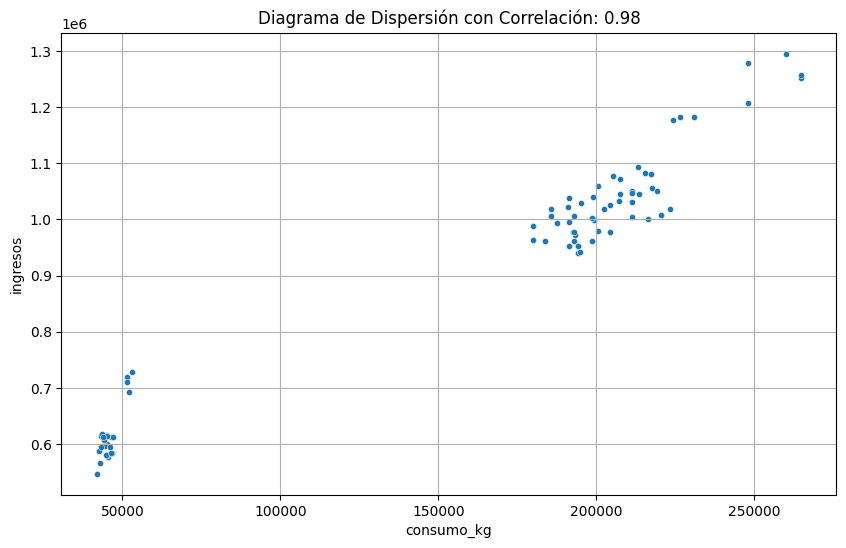

In [72]:
for valor,df_datos in dicc_multivariante.items():
    print(f"Respuesta {valor}")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1,tamano_puntos=20,mostrar_correlacion=True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.